In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv("Salary Data.csv")

In [3]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
data.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [6]:
data.shape[0]

375

In [7]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [8]:
data.duplicated().sum()

50

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(325, 6)

In [11]:
# convert male 1 and women in 2
data["Gender"] = data["Gender"].map({"Male":1,'Female':0})

In [12]:
# saprate catigorical and numerical data
categorical_faetures = data.dtypes[data.dtypes == "object"].index
numerical_faetures = data.dtypes[data.dtypes != "object"].index
print(categorical_faetures)
print(numerical_faetures)

Index(['Education Level', 'Job Title'], dtype='object')
Index(['Age', 'Gender', 'Years of Experience', 'Salary'], dtype='object')


In [13]:
data[categorical_faetures].describe()

,Education Level,Job Title
count,324,324
unique,3,174
top,Bachelor's,Director of Operations
freq,191,9


In [14]:
for i in categorical_faetures:
    print(i,data[i].value_counts())
    print("*"*60)

Education Level Bachelor's    191
Master's       91
PhD            42
Name: Education Level, dtype: int64
************************************************************
Job Title Director of Operations             9
Director of Marketing              8
Senior Marketing Manager           8
Senior Project Manager             7
Senior Business Analyst            6
                                  ..
Business Development Manager       1
Customer Service Representative    1
IT Manager                         1
Digital Marketing Manager          1
Junior Web Developer               1
Name: Job Title, Length: 174, dtype: int64
************************************************************


In [15]:
for i in categorical_faetures:
    print(i,data[i].unique())
    print("*"*60)

Education Level ["Bachelor's" "Master's" 'PhD' nan]
************************************************************
Job Title ['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketi

In [16]:
data.drop("Job Title",axis=1,inplace=True)

In [17]:
data.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,1.0,Bachelor's,5.0,90000.0
1,28.0,0.0,Master's,3.0,65000.0
2,45.0,1.0,PhD,15.0,150000.0
3,36.0,0.0,Bachelor's,7.0,60000.0
4,52.0,1.0,Master's,20.0,200000.0


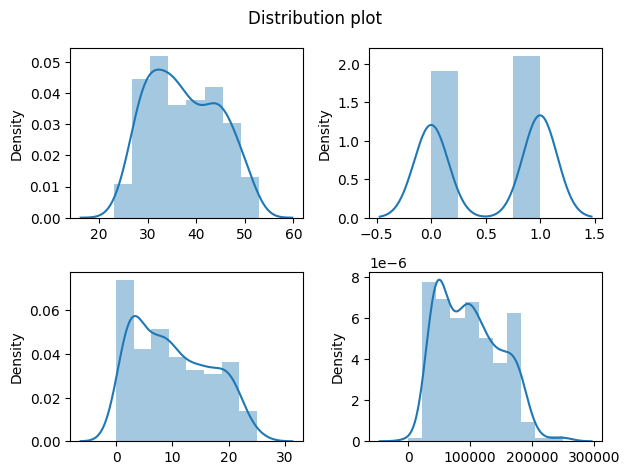

In [18]:
try:
    plt.suptitle("Distribution plot")
    for i in range(0,len(numerical_faetures)):
        plt.subplot(2,2,i+1)
        sns.distplot(x=data[numerical_faetures[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

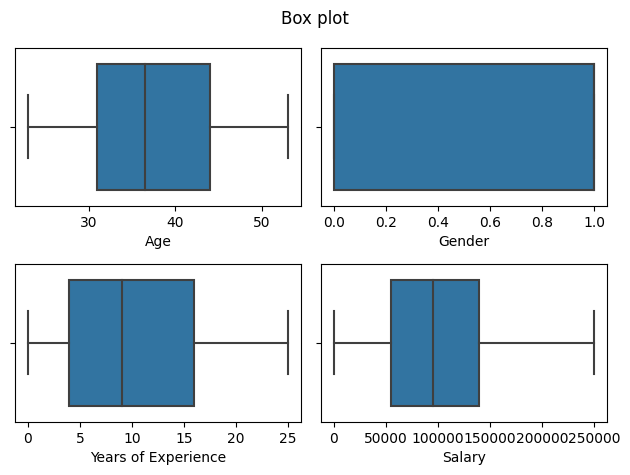

In [19]:
try:
    plt.suptitle("Box plot")
    for i in range(0,len(numerical_faetures)):
        plt.subplot(2,2,i+1)
        sns.boxplot(x=data[numerical_faetures[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

<AxesSubplot:xlabel='Education Level', ylabel='count'>

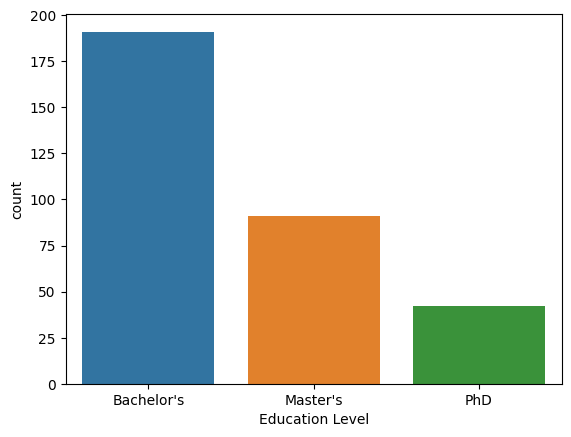

In [20]:
sns.countplot(data["Education Level"])

<AxesSubplot:>

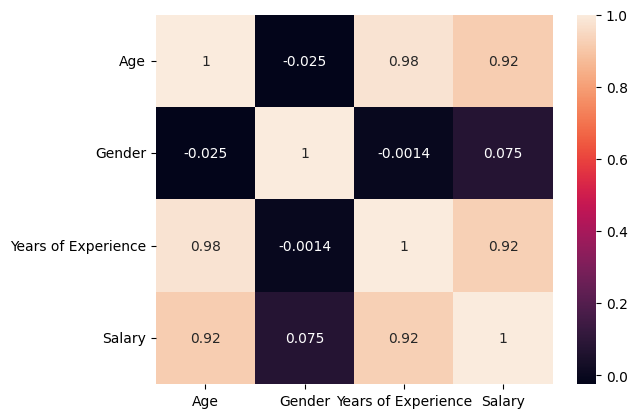

In [21]:
sns.heatmap(data.corr(),annot=True)

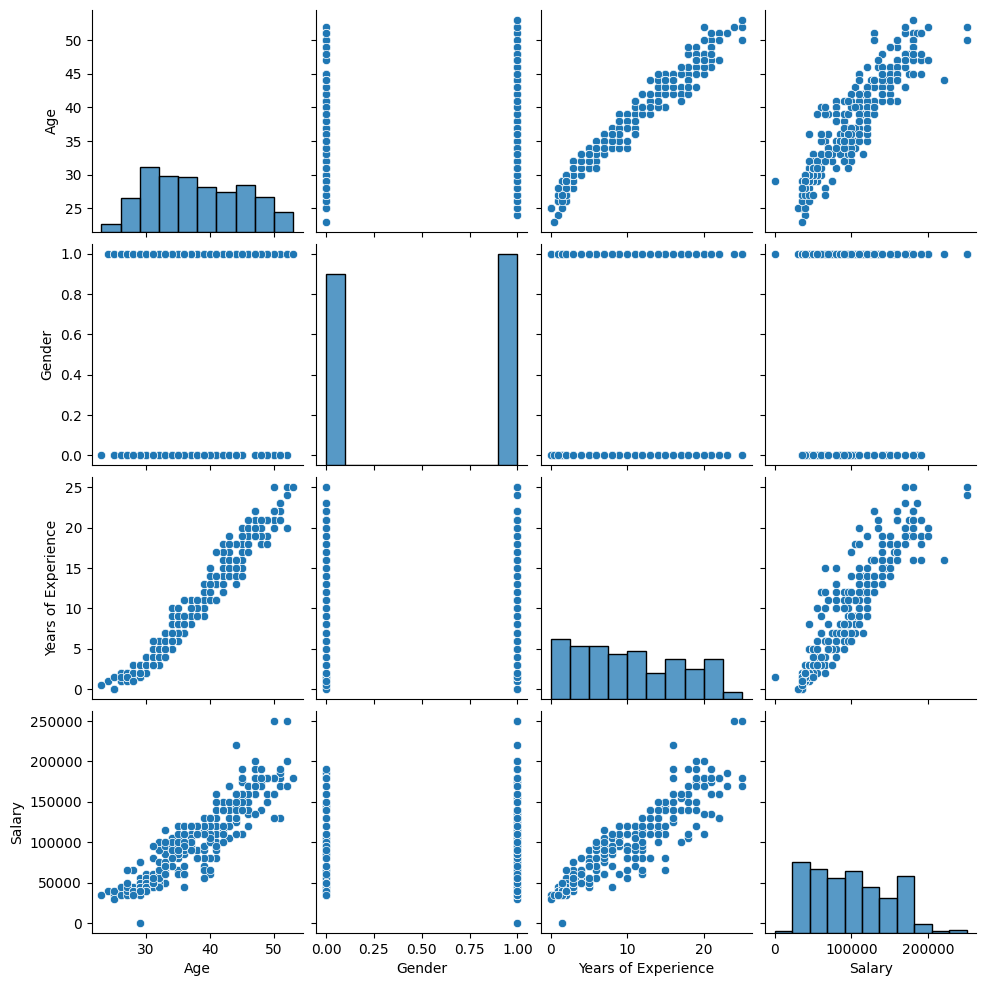

In [22]:
sns.pairplot(data)

## Model Traning

In [23]:
data.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,1.0,Bachelor's,5.0,90000.0
1,28.0,0.0,Master's,3.0,65000.0
2,45.0,1.0,PhD,15.0,150000.0
3,36.0,0.0,Bachelor's,7.0,60000.0
4,52.0,1.0,Master's,20.0,200000.0


In [24]:
data["Salary"] = data["Salary"].fillna(np.nanmedian(data["Salary"]))

In [25]:
data["Education Level"] = data["Education Level"].str.replace("'s","")

In [26]:
data["Education Level"] = data["Education Level"].map({"Bachelor":1,"Master":2,"PhD":3})

In [27]:
# Saprate Dependant and indipent variable
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [28]:
## saprate numerical and categorical features
categorical_faetures = x.select_dtypes(include="object").columns
numerical_faetures = x.select_dtypes(exclude="object").columns
print(categorical_faetures)
print(numerical_faetures)

Index([], dtype='object')
Index(['Age', 'Gender', 'Education Level', 'Years of Experience'], dtype='object')


In [29]:
from sklearn.impute import SimpleImputer # handling missing values
from sklearn.preprocessing import OrdinalEncoder #ordinal Features
from sklearn.preprocessing import StandardScaler 
# pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [30]:
# Numerical Pipline

num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

# Catigorical Pipline

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)



# Transform Columns
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_faetures),
    ("cato_pipline",cato_pipline,categorical_faetures)
])

In [31]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(260, 4)
(65, 4)
(260,)
(65,)


In [33]:
# Transform data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [35]:
def model_evalution(test,predict):
    mse = mean_squared_error(test,predict)
    mae = mean_absolute_error(test,predict)
    rmse = np.sqrt(mse)
    r2score = r2_score(test,predict)
    return mse,mae,rmse,r2score

In [36]:
## Multiple Model Traning

models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lesso":Lasso(),
    "Elastic":ElasticNet()
}

model_list = []
r2_list = []


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    # Make Prediction
    y_pradict = model.predict(X_test)
    
    mse,mae,rmse,r2sore = model_evalution(y_test,y_pradict)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Traning Performance")
    print("MSE",mse*100)
    print("MAE",mae*100)
    print("RMSE",rmse*100)
    print("R2",r2sore*100)
    print("="*40)

LinearRegression
Model Traning Performance
MSE 14795895114.628708
MAE 921999.8911920311
RMSE 1216383.7846102975
R2 93.51871345457214
Ridge
Model Traning Performance
MSE 14700571918.982056
MAE 921022.3139154806
RMSE 1212459.1506101168
R2 93.56046942409108
Lesso
Model Traning Performance
MSE 14801101832.910627
MAE 922090.6626959761
RMSE 1216597.7902704997
R2 93.51643267109233
Elastic
Model Traning Performance
MSE 17687217869.80486
MAE 1113266.397904033
RMSE 1329933.000936696
R2 92.25218032991617


In [37]:
y_pradict

array([ 65903.55920532, 125802.23013768, 154350.8574298 , 124729.50195137,
       172014.4270237 , 154199.15633409,  63668.79990887, 101282.68155873,
        84388.43795973,  98896.22116658, 105752.20015163, 130271.74873058,
       112267.45718705, 125650.52904198,  46749.07238611,  50108.54303448,
       142544.77264098,  55594.106804  ,  51521.99317042,  56812.82092382,
        43100.86295373, 152116.09813335,  70676.47998963, 130120.04763487,
        77684.16007039, 151964.39703765,  34382.0457078 ,  53756.75246687,
       171093.3999331 ,  86926.59944759, 164085.71985234,  53605.05137116,
       158972.0771184 ,  66055.26030103, 142393.07154528,  82153.67866328,
        89161.35874404,  92809.56817643,  82153.67866328, 161699.25946019,
        55619.59072775,  61434.04061243, 103669.14195089, 121509.89656425,
        49135.53277827,  58226.27105977,  51370.29207472,  51370.29207472,
       152608.52117869,  86597.71333242,  87419.02249293, 122646.44375063,
        66055.26030103, 1

In [38]:
data.to_csv("clean_salary_data.csv",index=False)